# Conducting customer analytics with Python
In this section, we are going to discuss how to conduct customer analytics using Python. We will be mainly using the pandas 
and matplotlib packages to analyze and visualize the customer behavior observed in the dataset. 

In [2]:
import matplotlib.pyplot as plt

In [1]:
# importing the pandas library and loading the dataset
import pandas as pd
df = pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [5]:
# returns the first five rows of the dataset 
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# returns the number of rows and columns in the dataset
df.shape

(9134, 24)

## Analytics on engaged customers
Now that we have loaded the data into our Python environment, we are going
to analyze it to understand how different customers behave and react to
different marketing strategies. We are going to follow these steps:
1. Overall engagement rate
2. Engagement rates by offer type
3. Engagement rates by offer type and vehicle class
4. Engagement rates by sales channel
5. Engagement rates by sales channel and vehicle size

### Overall engagement rate

In [7]:
# We can use the following code to get the total number of customers who have responded
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

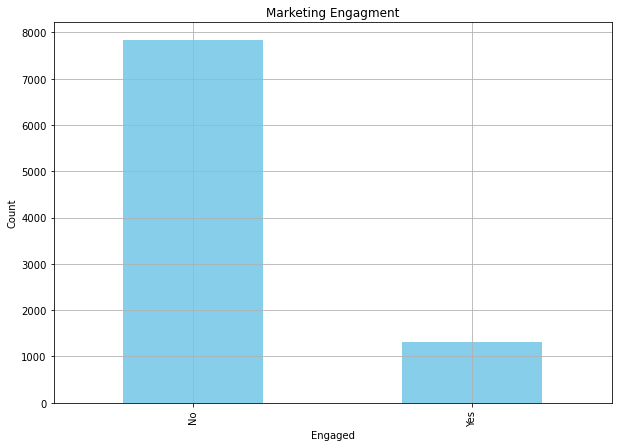

In [8]:
# In order to visualize the above in a plot, you can use the following code:


ax = df.groupby('Response').count()['Customer'].plot(
kind='bar',
color='skyblue',
grid=True,
figsize=(10, 7),
title='Marketing Engagment'
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()


In [9]:
# We can use the following code to get the percentage of customers who have responded
df.groupby('Response').count()['Customer']/df.shape[0]*100

Response
No     85.679877
Yes    14.320123
Name: Customer, dtype: float64

### Engagement rates by offer type

In [10]:
# we are going to look into what types of offers worked best for the engaged customers. Take a look at the following code:

by_offer_type_df = df.loc[df['Response'] == 'Yes'].groupby(['Renew Offer Type']).count()['Customer'] / df.groupby('Renew Offer Type').count()['Customer']*100

In [11]:
by_offer_type_df

Renew Offer Type
Offer1    15.831557
Offer2    23.376623
Offer3     2.094972
Offer4          NaN
Name: Customer, dtype: float64

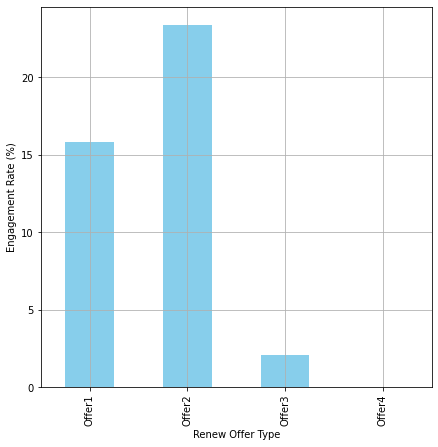

In [12]:
# We can visualize these results in a bar plot, using the following code:
ax = (by_offer_type_df).plot(
kind='bar',
figsize=(7, 7),
color='skyblue',
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

### Engagement rates by offer type and vehicle class

In [13]:
#We are going tolook at the engagement rates by each offer type and Vehicle Class using thefollowing code

by_offer_type_df = df.loc[df['Response'] == 'Yes'].groupby(['Renew Offer Type', 'Vehicle Class']).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']*100

In [14]:
by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car     7.036247
                  Luxury Car        0.159915
                  Luxury SUV        0.479744
                  SUV               4.477612
                  Sports Car        1.119403
                  Two-Door Car      2.558635
Offer2            Four-Door Car    11.483254
                  Luxury Car        0.205058
                  Luxury SUV        0.410116
                  SUV               4.101162
                  Sports Car        1.640465
                  Two-Door Car      5.536569
Offer3            Four-Door Car     1.675978
                  Two-Door Car      0.418994
Name: Customer, dtype: float64

In [15]:
by_offer_type_df = pd.DataFrame(by_offer_type_df)

In [16]:
# To make this more readable, we can transform this data by using the followingcode
by_offer_type_df = by_offer_type_df.unstack().fillna(0)

In [17]:
by_offer_type_df.T

Renew Offer Type          Offer1     Offer2    Offer3
         Vehicle Class                               
Customer Four-Door Car  7.036247  11.483254  1.675978
         Luxury Car     0.159915   0.205058  0.000000
         Luxury SUV     0.479744   0.410116  0.000000
         SUV            4.477612   4.101162  0.000000
         Sports Car     1.119403   1.640465  0.000000
         Two-Door Car   2.558635   5.536569  0.418994

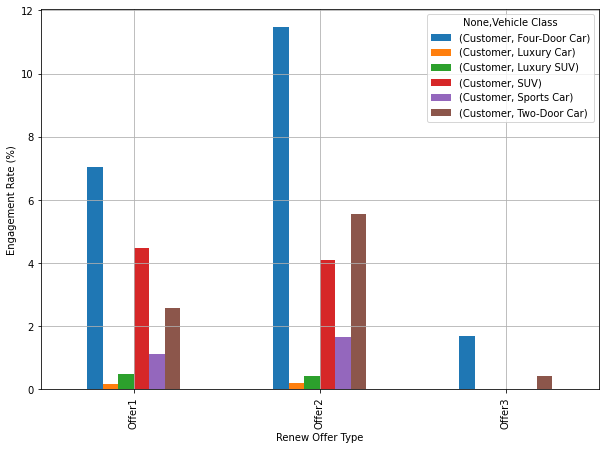

In [19]:
# We can visualize this data as a bar plot, using thefollowing code

ax = (by_offer_type_df).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.xticks(label = ['Offer 1', 'Offer 2', 'Offer 3'])
plt.show()


### Engagement rates by sales channel

In [20]:
# We will analyze how engagement rates differ by different sales channels. Take a look at the following code:
by_sales_channel_df = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']*100
by_sales_channel_df

Sales Channel
Agent          19.154443
Branch         11.453058
Call Center    10.878187
Web            11.773585
Name: Customer, dtype: float64

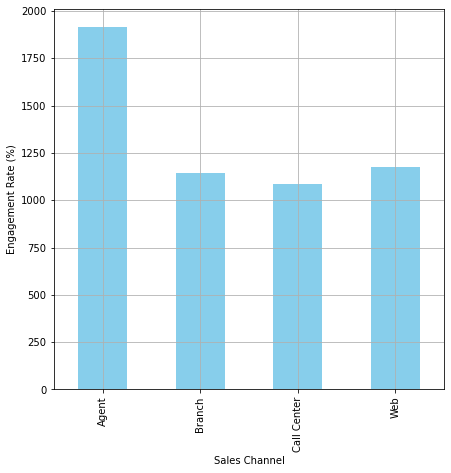

In [21]:
# It will be easier to look at this result with a visualization. You can use the following code to visualize this data:
ax = (by_sales_channel_df*100.0).plot(
kind='bar',
figsize=(7, 7),
color='skyblue',
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()

### Engagement rates by sales channel and vehicle size

In [22]:
# we will take a look at whether customers with various vehicle sizes respond differently to different sales channels. 
#The following code will compute the engagement rates per sales channel and vehicle size:

by_sales_channel_df = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel', 'Vehicle Size']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']*100


In [23]:
by_sales_channel_df = pd.DataFrame(by_sales_channel_df)

In [24]:
#we can unstack this data into a more visible format, using the following code:

by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)

by_sales_channel_df   #.set_index('Vehicle Size')

Customer                     
Vehicle Size      Large    Medsize     Small
Sales Channel                               
Agent          2.070751  14.495255  2.588438
Branch         2.103623   7.479548  1.869887
Call Center    1.359773   6.798867  2.719547
Web            1.358491   9.509434  0.905660

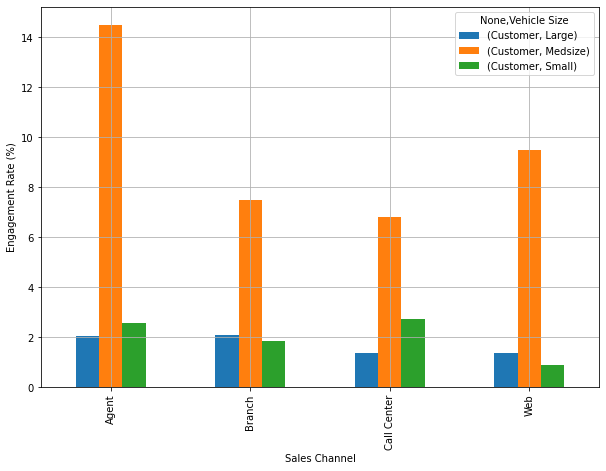

In [25]:
#We can visualize the above results into a bar chart, using the following code:

ax = (by_sales_channel_df).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()


### Segmenting customer base

In [26]:
#  a look at the following distribution of the Customer Lifetime Value column:
df["Customer Lifetime Value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [27]:
df["Customer Lifetime Value"]

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: Customer Lifetime Value, Length: 9134, dtype: float64

In [28]:
# we are going to define those customers with a Customer Lifetime Value higher than the median as high-CLV customers and
# those with a CLV below the median as low-CLV customers. You can use the following code for encoding:

df['CLV Segment'] = df['Customer Lifetime Value'].apply(lambda x: 'High' if x > df['Customer Lifetime Value'].median() else 'Low')

In [29]:
# We are going to go through the same process for the Months Since Policy Inception field

df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [30]:
df['Months Since Policy Inception'].median()

48.0

In [31]:
# we are going to define those customers with Months Since Policy
# Inception higher than the median as high Policy Age Segment customers and those
# below the median as low Policy Age Segment customers. You can use the
# following code for encoding:

df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low')


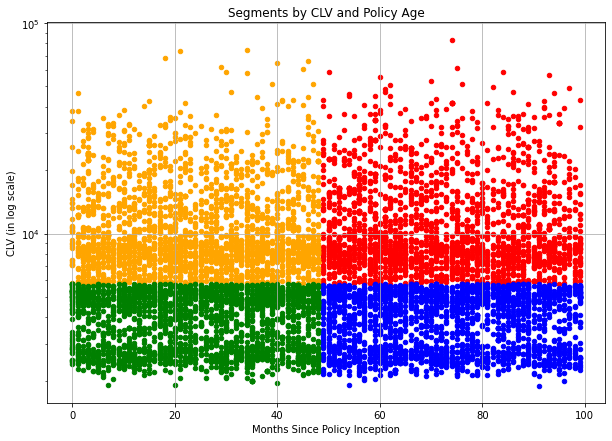

In [32]:
# We can visualize these segments using the following code:

ax = df.loc[
(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='red'
)

df.loc[
(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='blue'
)


df.loc[
(df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='orange'
)

df.loc[
(df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
ax=ax,
x='Months Since Policy Inception',
y='Customer Lifetime Value',
logy=True,
color='green',
grid=True,
figsize=(10, 7)
)
ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')
ax.set_title('Segments by CLV and Policy Age')
plt.show()

In [33]:
# let's see whether there is any noticeable difference in the engagement rates among these four segments with the following code.

engagment_rates_by_segment_df = df.loc[df['Response'] == 'Yes'].groupby(['CLV Segment', 'Policy Age Segment']).count()['Customer']/df.groupby(['CLV Segment', 'Policy Age Segment']).count()['Customer']*100


In [34]:
engagment_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  13.872832
             Low                   13.206733
Low          High                  16.245007
             Low                   13.995680
Name: Customer, dtype: float64

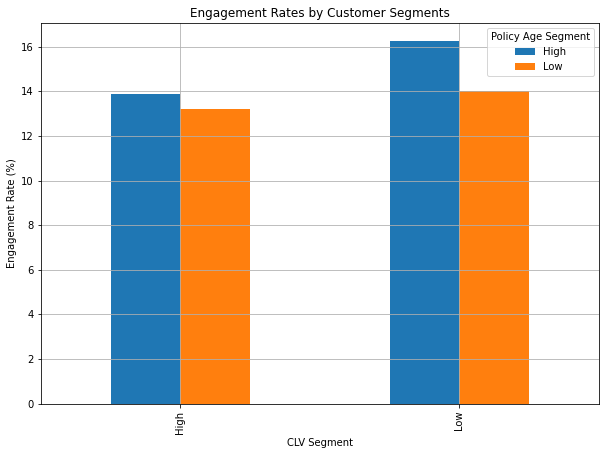

In [35]:
ax = (engagment_rates_by_segment_df.unstack()).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')
plt.show()